# Outliers

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('10.0.dataset_health.csv')
df

,id,age,poids,taille,genre,bmi,tension,cholesterol,glucide
0,0.0,40.0,84.0,183.0,M,25.1,133.0,237.0,116.0
1,1.0,40.0,83.0,162.0,M,31.6,132.0,222.0,131.0
2,2.0,52.0,62.0,161.0,F,23.9,139.0,227.0,111.0
3,3.0,63.0,70.0,185.0,M,20.5,119.0,212.0,106.0
4,4.0,43.0,58.0,160.0,F,22.7,146.0,232.0,101.0
...,...,...,...,...,...,...,...,...,...
4995,4995.0,77.0,53.0,153.0,F,22.6,130.0,235.0,130.0
4996,4996.0,38.0,66.0,171.0,M,22.6,113.0,231.0,114.0
4997,4997.0,73.0,62.0,169.0,F,21.7,117.0,268.0,120.0
4998,4998.0,37.0,70.0,195.0,F,18.4,126.0,201.0,76.0


### Attention, présence de valeurs manquantes !

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4950 non-null   float64
 1   age          4950 non-null   float64
 2   poids        4942 non-null   float64
 3   taille       4941 non-null   float64
 4   genre        4939 non-null   object 
 5   bmi          4943 non-null   float64
 6   tension      4950 non-null   float64
 7   cholesterol  4946 non-null   float64
 8   glucide      4949 non-null   float64
dtypes: float64(8), object(1)
memory usage: 351.7+ KB


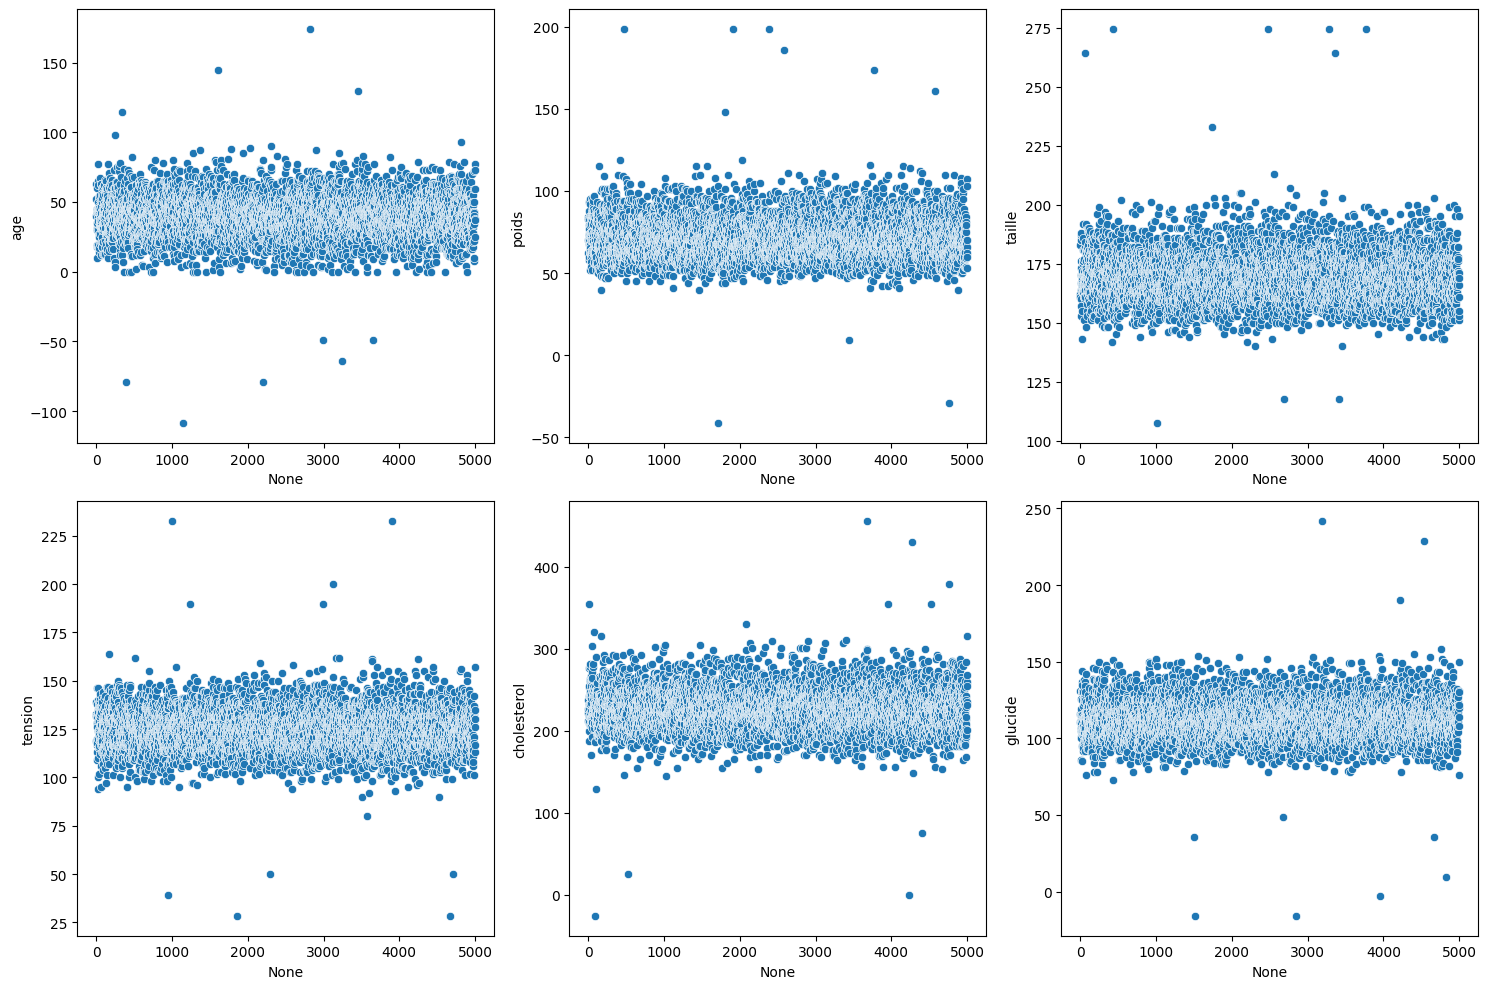

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'poids', 'taille', 'tension', 'cholesterol', 'glucide']

# make subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# plot histograms
for i, col in enumerate(cols):
    sns.scatterplot(x=df.index, y=df[col], data=df, ax=axes[i//3, i%3])
    
plt.tight_layout()
plt.show()

<Axes: xlabel='None', ylabel='age'>

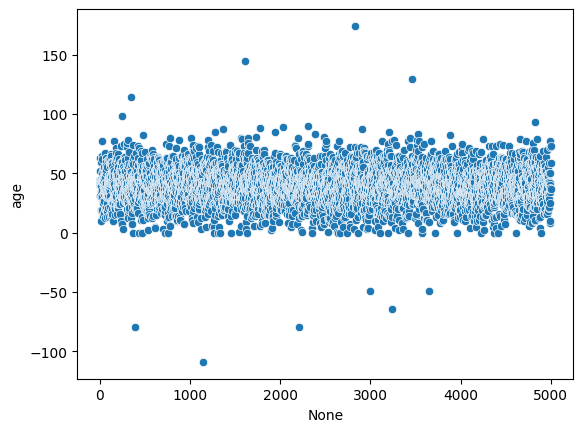

In [14]:
# plot only age

sns.scatterplot(x=df.index, y=df['age'], data=df)

In [15]:
# Age outliers ith z-scores 

# Calculate the z-score for each value in the 'age' column
z_scores = (df['age'] - df['age'].mean()) / df['age'].std()
z_scores

0      -0.007061
1      -0.007061
2       0.758176
3       1.459643
4       0.184248
          ...   
4995    2.352420
4996   -0.134601
4997    2.097341
4998   -0.198370
4999    1.204564
Name: age, Length: 5000, dtype: float64

In [16]:
# Find the indices of rows where the z-score is greater than 3 or less than -3
outlier_indices = z_scores[(z_scores < -3) | (z_scores > 3)].index
outlier_indices

Index([ 242,  345,  392, 1144, 1607, 1780, 2036, 2204, 2308, 2827, 2998, 3239,
       3457, 3652, 4820],
      dtype='int64')

In [17]:
# Display the rows with outliers
print(df.loc[outlier_indices])


          id         age  poids  taille genre   bmi  tension  cholesterol  \
242    242.0   98.000000  101.0   192.0     M  27.4    132.0        250.0   
345    345.0  114.678998   65.0   182.0     M  19.6    106.0        171.0   
392    392.0  -79.113037   84.0   173.0     M  28.1    123.0        223.0   
1144  1144.0 -108.927196   59.0   174.0     F  19.5    115.0        187.0   
1607  1607.0  144.493157   59.0   154.0     F  24.9    103.0        187.0   
1780  1780.0   88.000000   48.0   159.0     F  19.0    125.0        198.0   
2036  2036.0   89.000000   81.0   176.0     M  26.1    129.0        261.0   
2204  2204.0  -79.113037   69.0   147.0     F  31.9    134.0        261.0   
2308  2308.0   90.000000   63.0   159.0     F  24.9    119.0        245.0   
2827  2827.0  174.307317   68.0   158.0     F  27.2    109.0        201.0   
2998  2998.0  -49.298878   71.0   171.0     F  24.3    117.0        220.0   
3239  3239.0  -64.205957   74.0   163.0     F  27.9    132.0        231.0   

In [18]:
# Fill outliers values with mean()
# df.loc[outlier_indices, 'age'] = df['age'].mean()

# Remove outliers
df_no_age_outliers = df.drop(outlier_indices)

<Axes: xlabel='None', ylabel='age'>

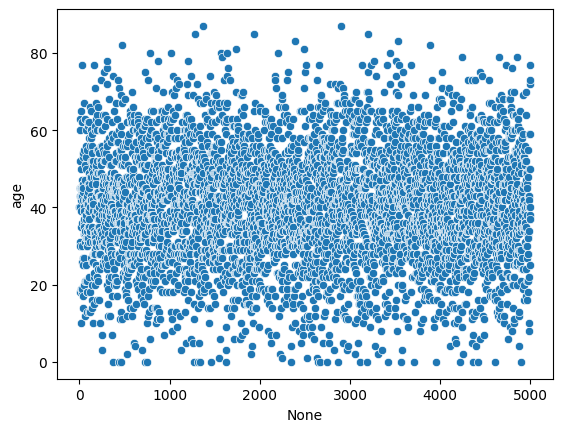

In [23]:
sns.scatterplot(x=df_no_age_outliers.index, y=df_no_age_outliers['age'], data=df_no_age_outliers)

# poids outliers With IQR


In [24]:
# Calculate the first and third quartiles
Q1 = df['poids'].quantile(0.25)
Q3 = df['poids'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Find the indices of rows where the poids is an outlier
outlier_indices = df[(df['poids'] < Q1 - 1.5 * IQR) | (df['poids'] > Q3 + 1.5 * IQR)].index
outlier_indices

Index([ 148,  208,  394,  413,  455,  466, 1414, 1419, 1470, 1572, 1718, 1799,
       1847, 1904, 2027, 2386, 2582, 2641, 2777, 3083, 3254, 3436, 3721, 3749,
       3769, 3952, 4127, 4158, 4248, 4378, 4404, 4576, 4714, 4758, 4824],
      dtype='int64')

In [25]:
# Display the rows with outliers
df.loc[outlier_indices]


,id,age,poids,taille,genre,bmi,tension,cholesterol,glucide
148,148.0,49.0,115.000000,178.0,M,36.3,147.0,244.0,127.000000
208,208.0,44.0,109.000000,177.0,M,34.8,115.0,265.0,129.000000
394,394.0,39.0,110.000000,161.0,M,42.4,133.0,278.0,119.000000
413,413.0,48.0,119.000000,158.0,M,47.7,127.0,210.0,134.000000
455,455.0,27.0,109.000000,177.0,M,34.8,126.0,269.0,138.000000
466,466.0,55.0,198.807858,156.0,F,28.8,110.0,146.0,111.000000
1414,1414.0,63.0,109.000000,177.0,M,34.8,123.0,269.0,121.000000
1419,1419.0,45.0,115.000000,179.0,M,35.9,115.0,228.0,132.000000
1470,1470.0,62.0,110.000000,167.0,M,39.4,141.0,247.0,139.000000
1572,1572.0,29.0,115.000000,163.0,M,43.3,132.0,290.0,129.000000


<Axes: xlabel='None', ylabel='poids'>

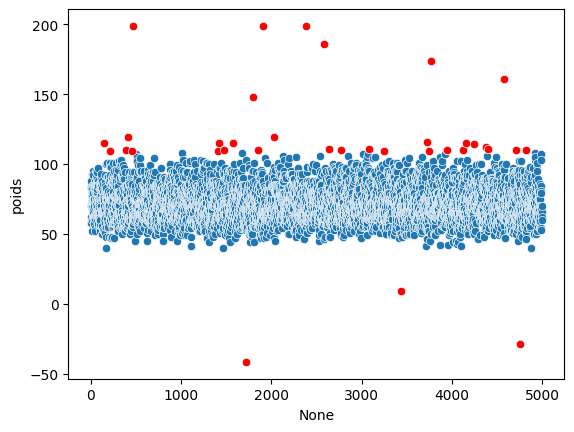

In [26]:
# scatter the rows by coloring in red outliers
sns.scatterplot(x=df.index, y=df['poids'], data=df)
sns.scatterplot(x=outlier_indices, y=df.loc[outlier_indices, 'poids'], color='red')

In [27]:
# Fill outliers values with median()
# df.loc[outlier_indices, 'poids'] = df['poids'].median()

# Remove outliers
# df_no_poids_outliers = df.drop(outlier_indices)

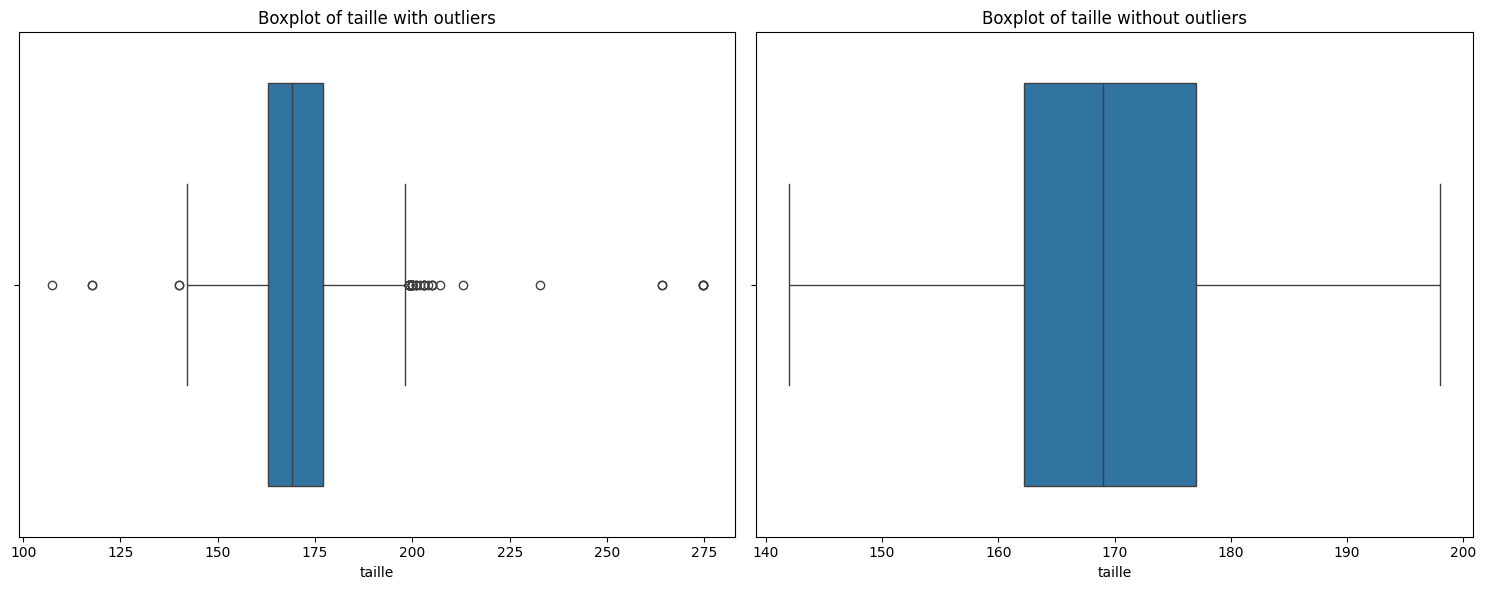

In [29]:
# taille outliers with boxplot

# Create a boxplot of the 'taille' column
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['taille'])
plt.title('Boxplot of taille with outliers')

# Q1 and Q3
Q1 = df['taille'].quantile(0.25)
Q3 = df['taille'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Find the indices of rows where the taille is an outlier
outlier_indices = df[(df['taille'] < Q1 - 1.5 * IQR) | (df['taille'] > Q3 + 1.5 * IQR)].index

# Plot the taille distribution without outliers
df_no_taille_outliers = df.drop(outlier_indices)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_taille_outliers['taille'])
plt.title('Boxplot of taille without outliers')

plt.tight_layout()
plt.show()


# Matrice de corrélation

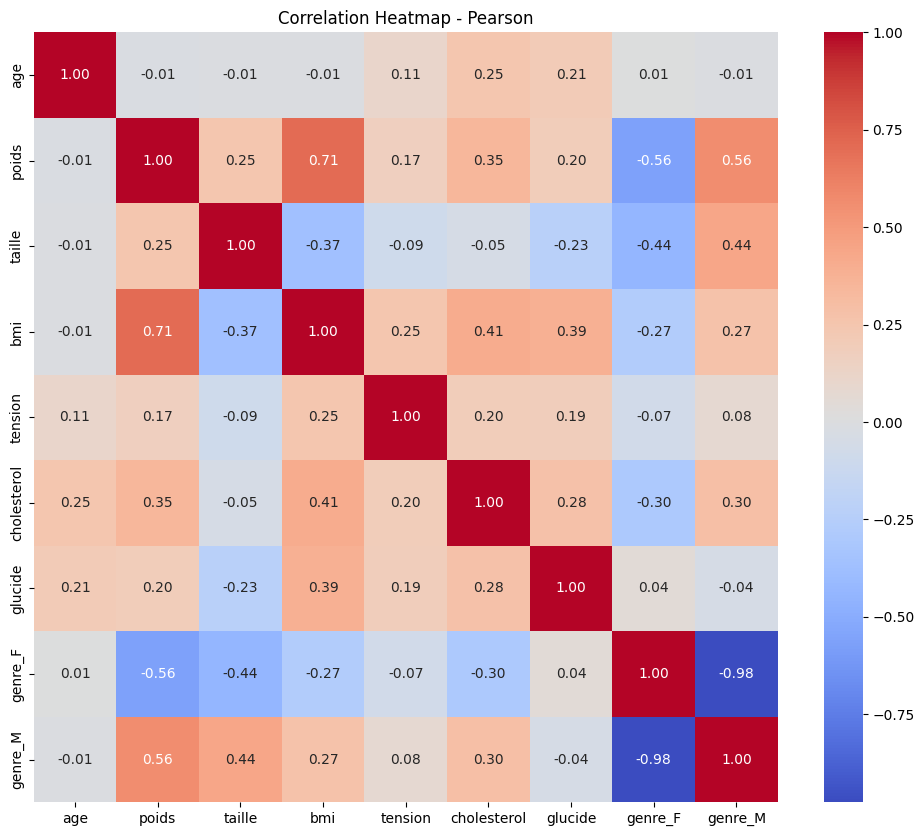

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame structure
# df = pd.DataFrame(...) # Assuming your DataFrame is already loaded

# One-hot encode categorical columns
encoded_df = pd.get_dummies(
    df.drop(columns=["id"]),  # Drop identifier column
    columns=["genre"],
    # drop_first=True  # Avoid multicollinearity
)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr(method="pearson")
# correlation_matrix = encoded_df.corr(method="spearman") # For Spearman correlation

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - Pearson")
plt.show()


# Bivariate analysis

### age / poids

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

df_cleaned = df.dropna(subset=['age', 'poids'])

# Prepare the data
X = df_cleaned[['age']]  # Independent variable (age)
y = df_cleaned['poids']  # Dependent variable (poids)

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the poids using the model
y_pred = model.predict(X)

# Example: Predict poids for a specific age
age_to_predict = 35
age_df = pd.DataFrame({'age': [age_to_predict]})
predicted_poids = model.predict(age_df)

print(f"Predicted poids for age {age_to_predict}: {predicted_poids[0]}")

Predicted poids for age 35: 72.4319635490334


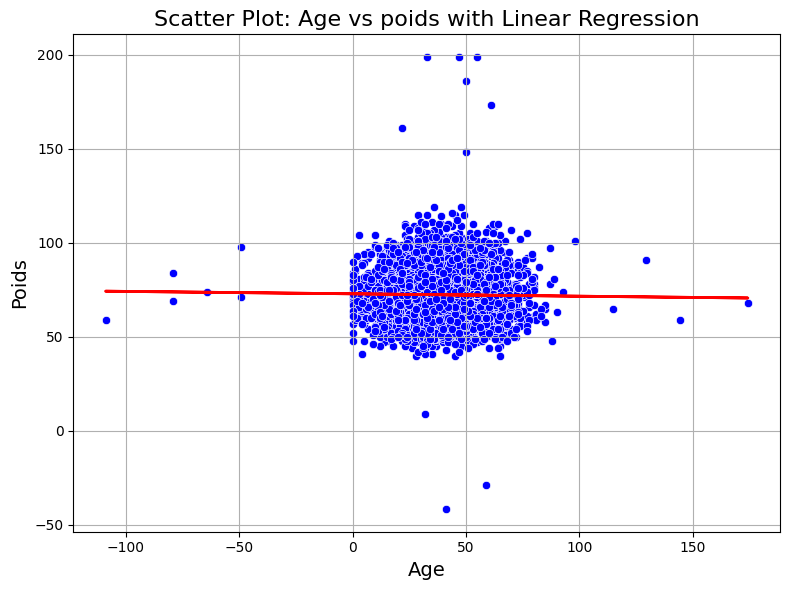

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='poids', data=df_cleaned, color='blue')

# Plot the regression line
plt.plot(df_cleaned['age'], y_pred, color='red', linewidth=2)

# Add title and labels
plt.title('Scatter Plot: Age vs poids with Linear Regression', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Poids', fontsize=14)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### /!\ Dans le graphique ci-dessus les outliers n'ont pas été traités !

### Genre / Poids Analysis

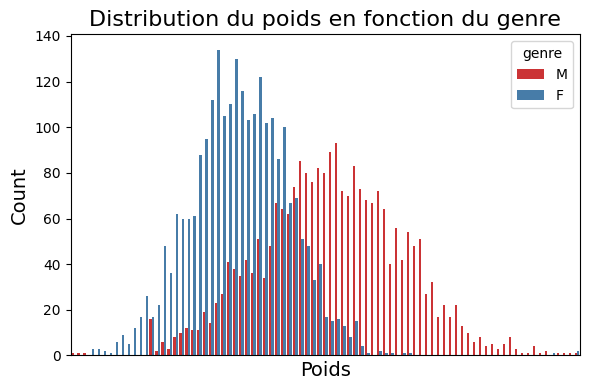

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'gender' and 'article_type' columns

plt.figure(figsize=(6, 4))

# Create a count plot for gender and article_type
sns.countplot(x='poids', hue='genre', data=df, palette='Set1')

# Add title and labels
plt.title('Distribution du poids en fonction du genre', fontsize=16)
plt.xlabel('Poids', fontsize=14)
plt.ylabel('Count', fontsize=14)
# no xticks
plt.xticks([])

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['id', 'age', 'poids', 'taille', 'genre', 'bmi', 'tension',
       'cholesterol', 'glucide'],
      dtype='object')

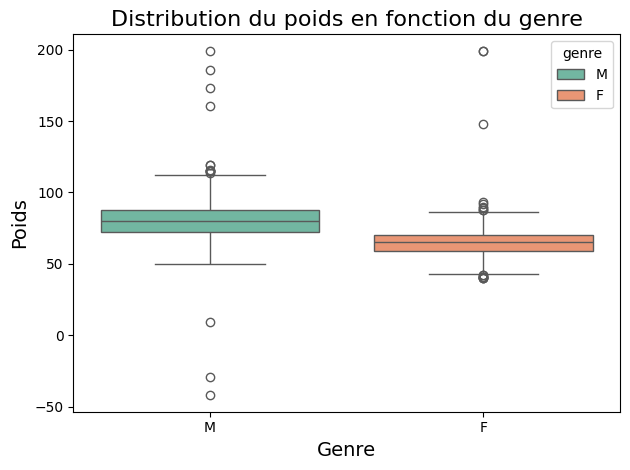

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a box plot for genre and poids
sns.boxplot(x='genre', y='poids', data=df, hue='genre', palette='Set2')

# Add title and labels
plt.title('Distribution du poids en fonction du genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Poids', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()
